In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10.0, 5.0)

### 黄金数据预处理

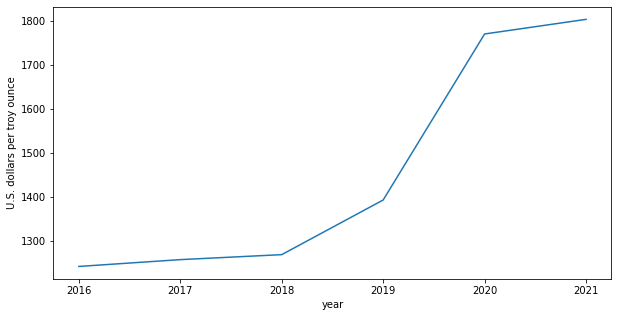

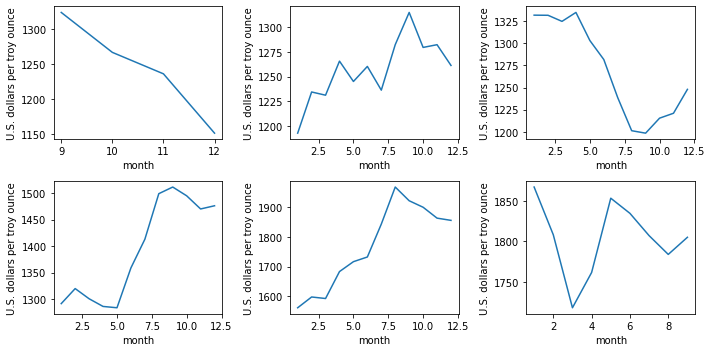

In [3]:
def date2week(string):
    month,day,year = string.split("/")
    year = "20"+ year
    return date(int(year),int(month),int(day)).weekday() + 1

df0 = pd.read_csv("../data/LBMA-GOLD.csv")
df0["week"] = list(map(date2week,df0["Date"]))
df0["year"] = list(map(lambda x:int("20"+x.split("/")[2]),df0["Date"]))
df0["month"] = list(map(lambda x:int(x.split("/")[0]),df0["Date"]))
df0["day"] = list(map(lambda x:int(x.split("/")[1]),df0["Date"]))
df0.to_csv("../data/LBMA-GOLD_processed.csv",index=False)

x = [2016,2017,2018,2019,2020,2021]
y = []

for i in x:
    y.append(df0[df0["year"] == i]["USD (PM)"].dropna().mean())
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("U.S. dollars per troy ounce")
plt.savefig("../picture/逐年黄金换美元价格")
plt.show()


y = []
for i in x:
    temp = []
    for j in range(1,13):
        temp.append(df0[df0["year"] == i][df0["month"] == j]["USD (PM)"].dropna().mean())
    y.append(temp)
    
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(range(1,13),y[i])
    plt.xlabel("month")
    plt.ylabel("U.S. dollars per troy ounce")
plt.tight_layout()   
plt.savefig("../picture/2016-2021年逐月黄金换美元价格")
plt.show()

### 比特币数据预处理

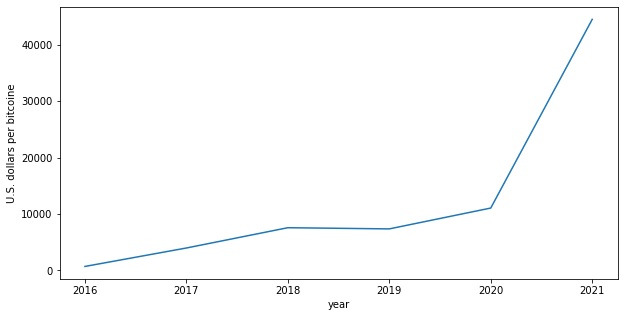

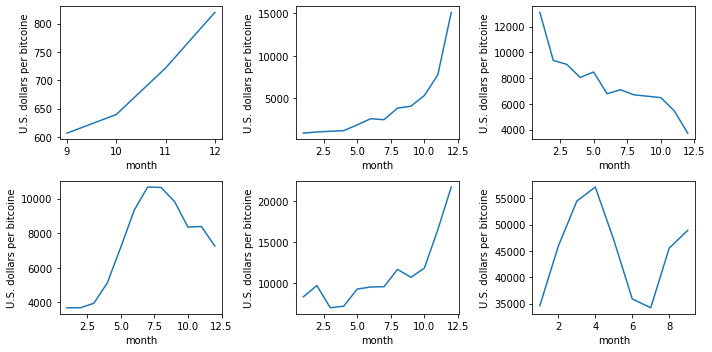

In [4]:
df0 = pd.read_csv("../data/BCHAIN-MKPRU.csv")
df0["week"] = list(map(date2week,df0["Date"]))
df0["year"] = list(map(lambda x:int("20"+x.split("/")[2]),df0["Date"]))
df0["month"] = list(map(lambda x:int(x.split("/")[0]),df0["Date"]))
df0["day"] = list(map(lambda x:int(x.split("/")[1]),df0["Date"]))
df0.to_csv("../data/BCHAIN-MKPRU_processed.csv",index=False)

x = [2016,2017,2018,2019,2020,2021]
y = []

for i in x:
    y.append(df0[df0["year"] == i]["Value"].dropna().mean())
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("U.S. dollars per bitcoine")
plt.savefig("../picture/逐年比特币换美元价格")
plt.show()

y = []
for i in x:
    temp = []
    for j in range(1,13):
        temp.append(df0[df0["year"] == i][df0["month"] == j]["Value"].dropna().mean())
    y.append(temp)
    
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(range(1,13),y[i])
    plt.xlabel("month")
    plt.ylabel("U.S. dollars per bitcoine")
plt.tight_layout()   
plt.savefig("../picture/2016-2021年逐月比特币换美元价格")
plt.show()